In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


2025-02-28 16:01:15.428612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset
file_path = 'sorted_stock_data_cleaned_nica.csv'
data = pd.read_csv(file_path)

In [3]:
Test_close=data['Close']

In [4]:
Test_close

0       660.0
1       651.0
2       646.0
3       648.0
4       648.0
        ...  
1915    363.0
1916    370.7
1917    382.0
1918    377.0
1919    374.5
Name: Close, Length: 1920, dtype: float64

In [5]:
# Ensure the dataset has the required 8 features
assert len(data.columns) == 9, "Dataset should have exactly 8 features!"

In [6]:
data.shape

(1920, 9)

In [7]:
# Normalize the dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
display(data_scaled[0])

array([0.48789809, 0.46419437, 0.49014455, 0.46709677, 0.4600432 ,
       0.00464305, 0.00414162, 0.27394474, 0.09914381])

In [ ]:
# Convert data into sequences
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Lookback period
X_train, y_train = create_sequences(data_scaled, seq_length)

In [10]:
X_train.shape

(1820, 100, 9)

In [11]:
reshaped_matrix = X_train.reshape(-1, 9)  # Collapse to (182000, 9)


In [12]:
inverse_transformed = scaler.inverse_transform(reshaped_matrix)


In [13]:
inverse_transformed.shape

(182000, 9)

In [14]:
inverse_transformed_reshaped = inverse_transformed.reshape(1820, 100, 9)


In [15]:
inverse_transformed_reshaped[0][0]

array([6.78000000e+02, 6.66000000e+02, 6.58000000e+02, 6.60000000e+02,
       0.00000000e+00, 3.54700000e+03, 2.34777100e+06, 1.79400000e+01,
       3.67892977e+01])

In [16]:
X_train[0][0], X_train

(array([0.48789809, 0.46419437, 0.49014455, 0.46709677, 0.4600432 ,
        0.00464305, 0.00414162, 0.27394474, 0.09914381]),
 array([[[0.48789809, 0.46419437, 0.49014455, ..., 0.00414162,
          0.27394474, 0.09914381],
         [0.46496815, 0.45652174, 0.47568988, ..., 0.00666046,
          0.27394474, 0.09733002],
         [0.45350318, 0.45012788, 0.4717477 , ..., 0.00698409,
          0.27394474, 0.09632236],
         ...,
         [0.17834395, 0.17519182, 0.19053876, ..., 0.0080593 ,
          0.39006611, 0.0301583 ],
         [0.18343949, 0.18030691, 0.19973719, ..., 0.01310317,
          0.39006611, 0.03030415],
         [0.18471338, 0.18797954, 0.19842313, ..., 0.02356736,
          0.39006611, 0.03161675]],
 
        [[0.46496815, 0.45652174, 0.47568988, ..., 0.00666046,
          0.27394474, 0.09733002],
         [0.45350318, 0.45012788, 0.4717477 , ..., 0.00698409,
          0.27394474, 0.09632236],
         [0.44713376, 0.44501279, 0.46911958, ..., 0.00799391,
          

In [17]:
# X_train_inverse = scaler.inverse_transform(X_train)

In [ ]:
# X_train_inverse.shape

NameError: name 'X_train_inverse' is not defined

In [ ]:
# X_train_inverse[0][0]

array([6.78000000e+02, 6.66000000e+02, 6.58000000e+02, 6.60000000e+02,
       0.00000000e+00, 3.54700000e+03, 2.34777100e+06, 1.79400000e+01,
       3.67892977e+01])

In [ ]:
y_train.shape, X_train.shape

In [ ]:
# stock="sorted_stock_data_cleaned_nica.csv"

In [ ]:
# data=pd.read_csv(stock)

In [ ]:
# data

In [ ]:
# data_test=data['Close']

In [ ]:
# data_test

In [ ]:
# import pandas as pd

# # Read CSV file
# df = pd.read_csv("NICA_Final_EPS_PE.csv")




In [ ]:
# # Scaling Data
# scaler = MinMaxScaler(feature_range=(0,1))
# # data_train_scaled = scaler.fit_transform(np.array(data_train).reshape(-1,1))
# # data_test_scaled = scaler.fit_transform(np.array(data_test).reshape(-1,1))

In [ ]:
# data_test_scaled.shape

In [ ]:
# x_test, y_test = [], []
# for i in range(100, len(data_test_scaled)):
#     x_test.append(data_test_scaled[i-100:i])
#     y_test.append(data_test_scaled[i, 0])
# x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
# print(f"Shape of train={x_test.shape}\nShape of data_test={y_test.shape}")

In [19]:
from tensorflow.keras.models import load_model

# Load the saved Keras model

model = load_model('lstm.keras')

# Now you can use the model to make predictions, evaluate, etc.


In [20]:
# # Evaluate the model
# from sklearn.metrics import mean_squared_error
# y_pred = model.predict(X_train)
# mse = mean_squared_error(y_train, y_pred)
# print(f"Test Mean Squared Error: {mse}")

In [21]:
X_train[0][0]

array([0.48789809, 0.46419437, 0.49014455, 0.46709677, 0.4600432 ,
       0.00464305, 0.00414162, 0.27394474, 0.09914381])

In [33]:
# Make Predictions
y_pred_scaled = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_train.reshape(-1,9)).reshape(y_train.shape)

57/57 [==============================] - 3s 44ms/step


In [34]:
y_pred.shape, y_test_actual.shape

((1820, 9), (1820, 9))

In [35]:
# y_pred[0][3]

In [36]:
# Assuming 'Close' is the 0th feature and 'PE Ratio' is the 5th feature in the dataset
# Extract the actual test values
X_test_close = y_test_actual[:, 3]  # Actual Close values from test data
X_test_pe = y_test_actual[:, 8]  # Actual PE Ratio values from test data
y_pred_close=y_pred[:,3]
y_pred_pe=y_pred[:,8]


In [37]:
X_test_close.shape, y_pred_close.shape

((1820,), (1820,))

In [41]:
X_test_close

array([424. , 432. , 436. , ..., 382. , 377. , 374.5])

In [42]:
y_pred_close

array([436.38904, 437.19107, 436.43912, ..., 411.10547, 415.61407,
       419.60068], dtype=float32)

In [43]:
y_pred_close.shape

(1820,)

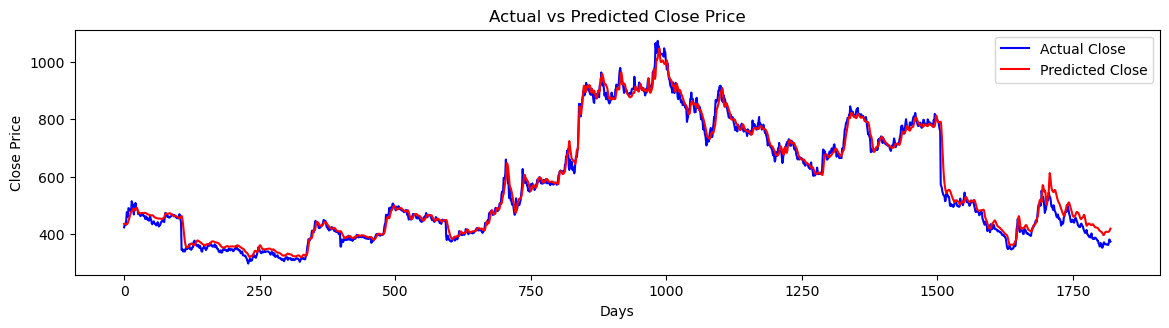

In [44]:
# Plot actual vs predicted values for Close and PE Ratio
plt.figure(figsize=(14, 7))

# Plot Close
plt.subplot(2, 1, 1)
plt.plot(X_test_close, label="Actual Close", color="blue")
plt.plot(y_pred_close, label="Predicted Close", color="red")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()


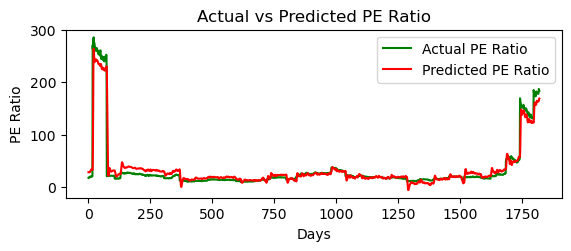

In [ ]:
# Plot PE Ratio
plt.subplot(2, 1, 2)
plt.plot(X_test_pe, label="Actual PE Ratio", color="green")
plt.plot(y_pred_pe, label="Predicted PE Ratio",  color="red")
plt.xlabel("Days")
plt.ylabel("PE Ratio")
plt.title("Actual vs Predicted PE Ratio")
plt.legend()

In [ ]:
# #for acutal
# for i in range(0, len(y_test_actual)):
#     y_acutal_close=[]
#     y_acutal_pe=[]
#     y_acutal_close.append(y_pred[i][3])
#     y_acutal_pe.append(y_pred[i][8])
    

In [ ]:
# y_test_actual[0][3]

In [ ]:
# y_test_actual=y_acutal_close
# y_pred=y_pred_close



In [ ]:
# y_pred_close

In [ ]:
# Performance Metrics
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R² Score:", r2_score(y_test_actual, y_pred))

In [ ]:
# import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title(f'{nica} Price Prediction')
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines with transparency
plt.savefig(f"{nica}.png")
plt.show()


In [ ]:
# For the reversing of the data
# import pandas as pd

# # Load the CSV file
# df = pd.read_csv("cleaned_file.csv")

# # Reverse the order of rows
# df = df[::-1].reset_index(drop=True)

# # Save the modified CSV
# df.to_csv("sorted_stock_data_cleaned_nica.csv", index=False)
